In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["figure.figsize"] = (20,10)

SPLIT_ID = 'S9'
data_dir = fr'D:\FINKI\40_diploma_thesis\data\splits\{SPLIT_ID.lower()}'
FEATURE = 'HostService_64kHz_vibration_1'

In [2]:
x_train = np.load(f'{data_dir}/x_train_{FEATURE}.npy')
y_train = np.load(f'{data_dir}\y_train.npy', allow_pickle = True)

In [3]:
healthy_signal = x_train[0]
damaged_signal = x_train[-1]

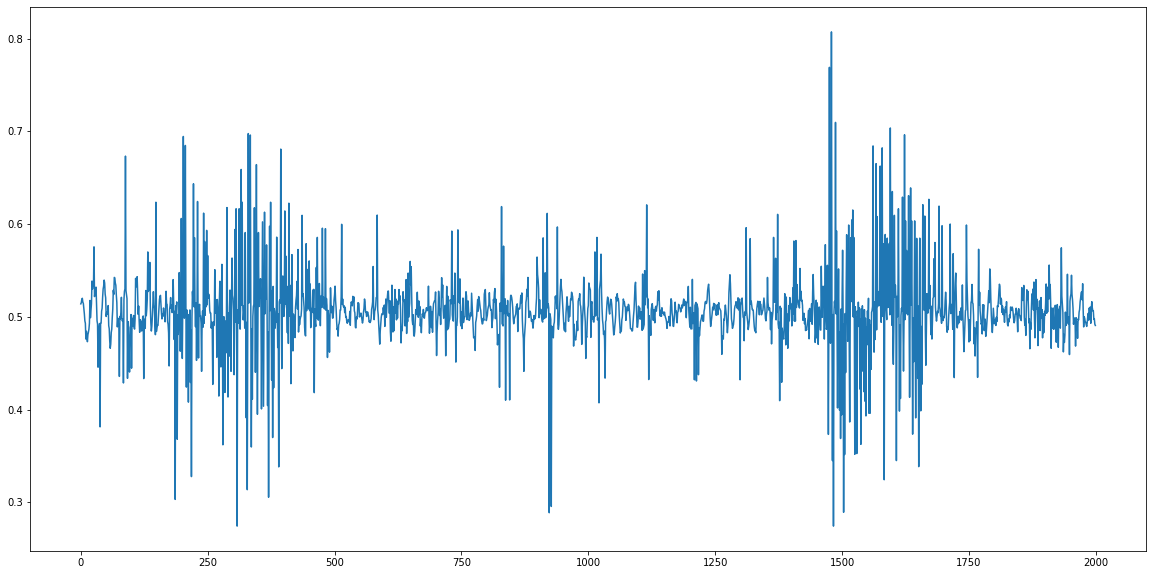

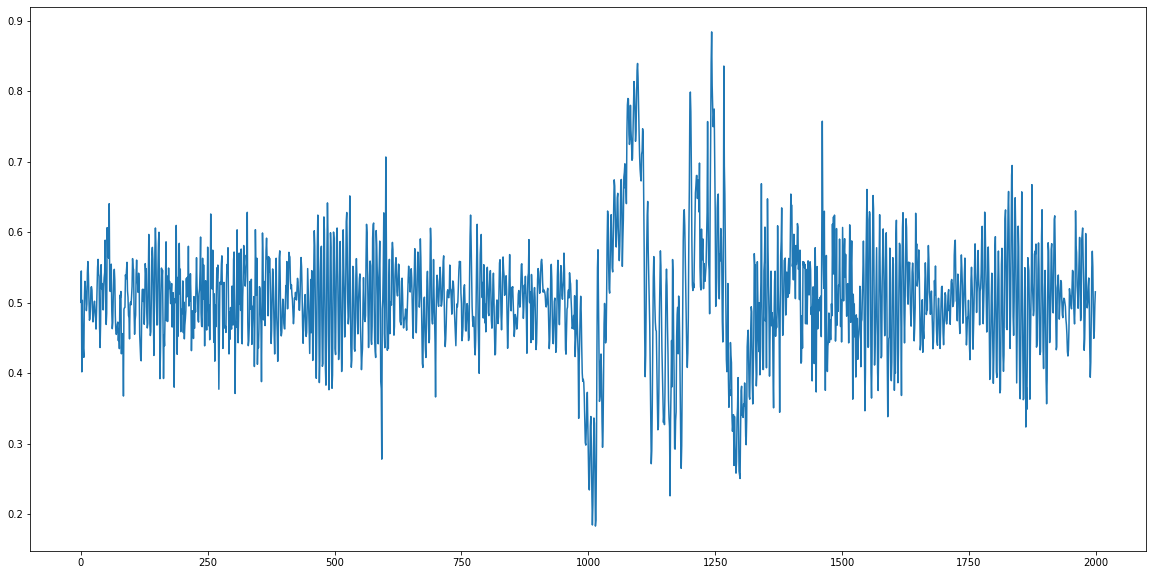

In [4]:
for signal in [healthy_signal, damaged_signal]:

    signal = signal[:2000]
    plt.plot(
        np.arange(signal.shape[0]),
        signal
    )
    plt.show()

In [5]:
ZERO_PADDING_MULTIPLE = 1
NUM_COEF_TO_SAVE = 12500

healthy_signal_fft = (np.abs(np.fft.fft(
        healthy_signal, n = healthy_signal.shape[0] * ZERO_PADDING_MULTIPLE)
) / healthy_signal.shape[0])[1:NUM_COEF_TO_SAVE]

damaged_signal_fft = (np.abs(np.fft.fft(
        damaged_signal, n = damaged_signal.shape[0] * ZERO_PADDING_MULTIPLE)
) / damaged_signal.shape[0])[1:NUM_COEF_TO_SAVE]

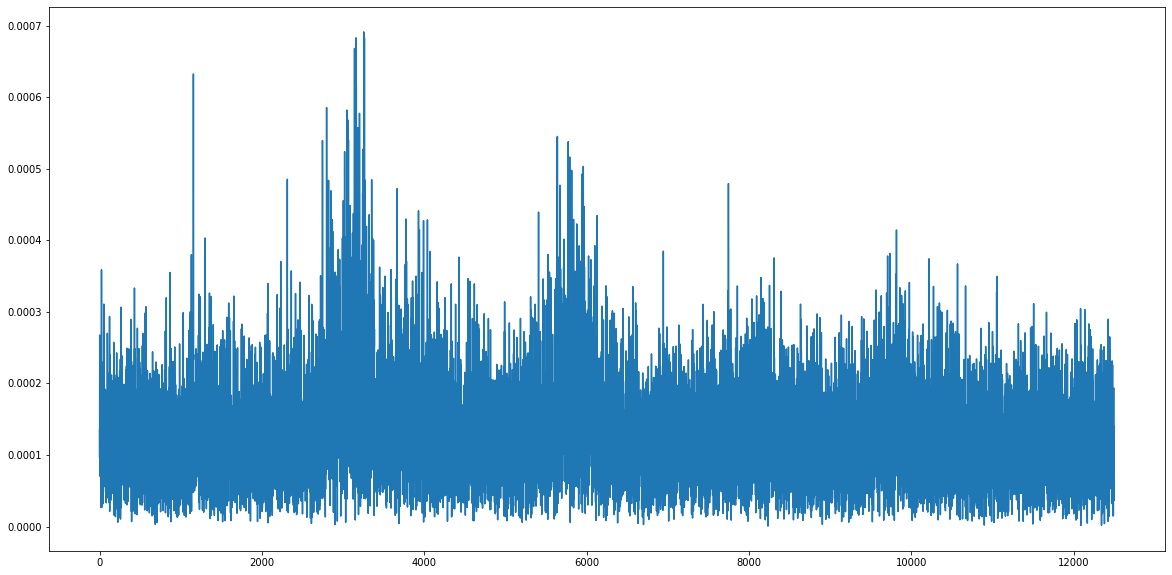

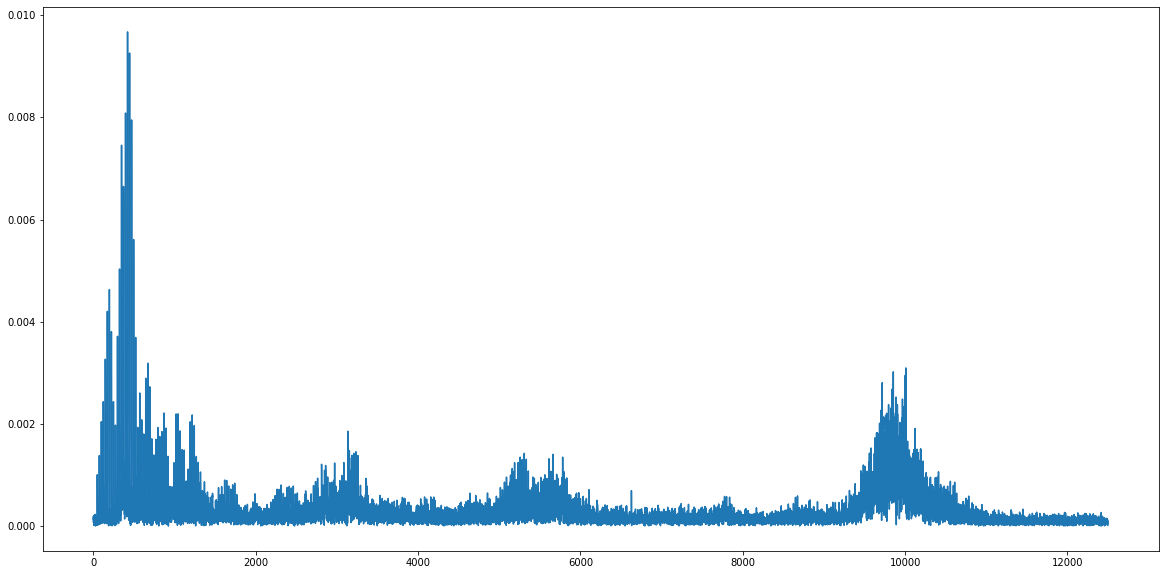

In [6]:
for signal in [healthy_signal_fft, damaged_signal_fft]:

    plt.plot(
        np.arange(signal.shape[0]),
        signal
    )
    plt.show()


In [7]:
# max_train_elements = 0
# min_train_elements = 100000
#
# for signal in [healthy_signal_fft, damaged_signal_fft]:
#     min_train_elements = min(min_train_elements, np.min(signal))
#     max_train_elements = max(max_train_elements, np.max(signal))
#
# for signal in [healthy_signal_fft, damaged_signal_fft]:
#     signal -= min_train_elements
#     signal /= (max_train_elements - min_train_elements)


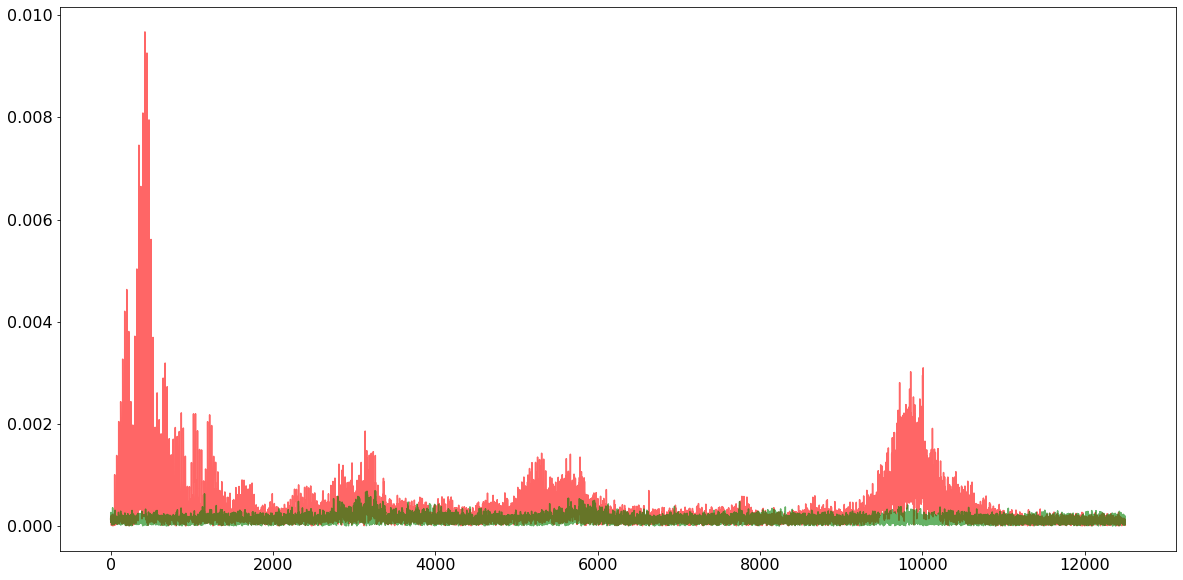

In [8]:
c = 'red'
for signal in [damaged_signal_fft, healthy_signal_fft]:

    plt.plot(
        np.arange(signal.shape[0]),
        signal,
        alpha = 0.6,
        color = c
    )
    c = 'green'

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('comparison.png', dpi = 330, bbox_inches='tight')

In [9]:
def histogram_sums(ordered_iterable, bin_width):

    more_bins_to_create = True
    current_start_position = 0
    bin_sums = list()
    while more_bins_to_create:
        bin_sums.append(
            sum(ordered_iterable[current_start_position:current_start_position+bin_width])
        )
        current_start_position += bin_width
        if current_start_position + bin_width > len(ordered_iterable):
            bin_sums.append(sum(ordered_iterable[current_start_position:]))
            more_bins_to_create = False

    return np.array(bin_sums)

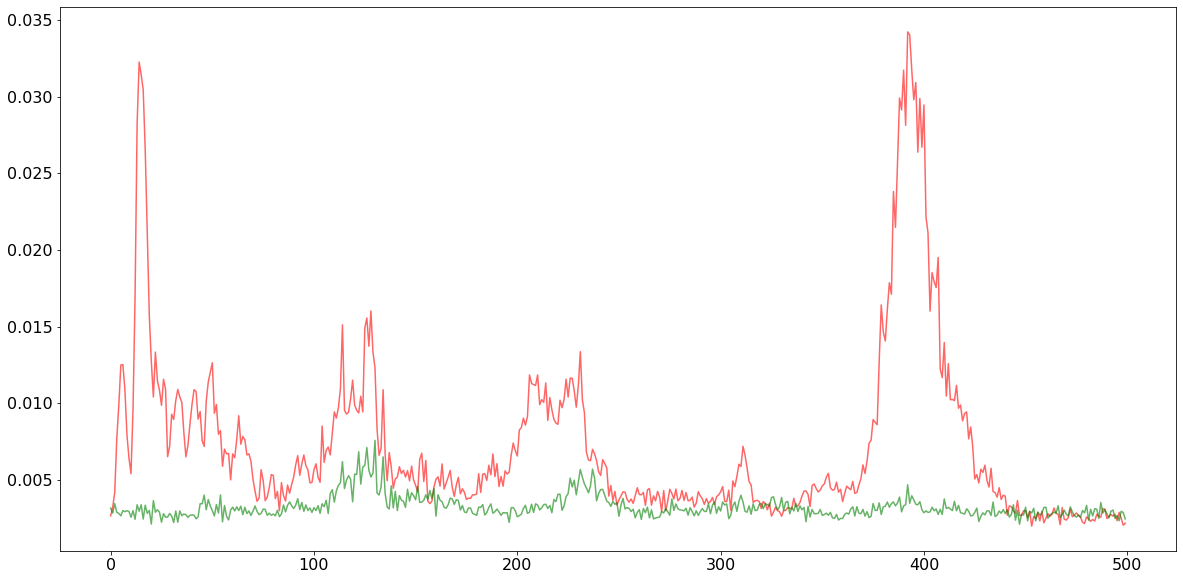

In [10]:

c = 'red'
for signal in [histogram_sums(damaged_signal_fft, 25), histogram_sums(healthy_signal_fft,25)]:

    plt.plot(
        np.arange(signal.shape[0]),
        signal,
        alpha = 0.6,
        color = c
    )
    c = 'green'
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('comparison_histogram.png', dpi = 330, bbox_inches='tight')

In [23]:

(np.abs(np.fft.fft(
        damaged_signal, n = damaged_signal.shape[0] * ZERO_PADDING_MULTIPLE)
) / damaged_signal.shape[0]).shape

(64000,)